In [3]:
import os
os.chdir("/scratch/ak1774/runs")
import wandb

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colors = ["r","g","b","y","b","c"]

In [32]:
api = wandb.Api()
#sweep = api.sweep("adam_katona/uncategorized/nz2cbo33")
sweep = api.sweep("adam_katona/uncategorized/1et744w7")
sweep_runs = list(sweep.runs)
sweep = api.sweep("adam_katona/uncategorized/co0z680h")
sweep_runs.extend(sweep.runs)

In [33]:
def get_unique(runs,key):
    unique_set = set([run.config[key] for run in runs])
    return unique_set

def select_where_key_is(runs,key,value):
    selected = []
    for run in runs:
        if run.config[key] == value:
            selected.append(run)
    return selected

def group_by(runs,key):
    unique_vals = get_unique(runs,key)
    grouped_runs = {}
    for val in unique_vals:
        seleced_runs = select_where_key_is(runs,key,val)
        grouped_runs[val] = seleced_runs
    return grouped_runs

envs = get_unique(sweep_runs,"env_id")
print(envs)

{'QDHalfCheetahBulletEnv-v0', 'QDAntBulletEnv-v0', 'QDHopperBulletEnv-v0', 'QDWalker2DBulletEnv-v0'}


In [34]:
env_runs = group_by(sweep_runs,"env_id")

In [41]:
def config_to_algo_name(config):
    
    # turn_update_mode_into_letters
    update_modes = config["ES_UPDATES_MODES_TO_USE"]
    update_modes_string = ""
    for update_mode in update_modes:
        if update_mode == "fitness":
            update_modes_string += "f_"
        elif update_mode == "evolvability":
            update_modes_string += "e_"
        elif update_mode == "innovation":
            update_modes_string += "i_"
        elif update_mode == "quality_evolvability":
            update_modes_string += "qe_"
        elif update_mode == "quality_innovation":
            update_modes_string += "qi_"
        elif update_mode == "quality_evolvability_innovation":
            update_modes_string += "qei_"
        else:
            raise "update_mode wtf"
    
    # turn selection_mode and metric into string
    
    def metric_to_letter(metric):
        if metric == "eval_fitness":
            return "f"
        elif metric == "evolvability":
            return "e"
        elif metric == "innovation":
            return "i"
    
    if config["BMAP_type_and_metrics"]["type"] == "single_map":
        type_metric_sting = "single_" + metric_to_letter(config["BMAP_type_and_metrics"]["metrics"][0])
    elif config["BMAP_type_and_metrics"]["type"] == "nd_sorted_map":
        type_metric_sting = "nd_"
        for metric in config["BMAP_type_and_metrics"]["metrics"]:
            type_metric_sting += metric_to_letter(metric) + "_"
    elif config["BMAP_type_and_metrics"]["type"] == "multi_map":
        type_metric_sting = "multi_"
        for metric in config["BMAP_type_and_metrics"]["metrics"]:
            type_metric_sting += metric_to_letter(metric) + "_"
    else:
        raise "wtf"
    
    label_string = type_metric_sting + "___" + update_modes_string
    return label_string
    
    
    

In [ ]:
multi_metric_runs

QDHalfCheetahBulletEnv-v0 nonempty_ratio


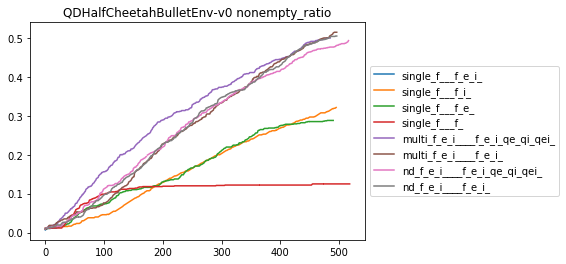

QDAntBulletEnv-v0 nonempty_ratio


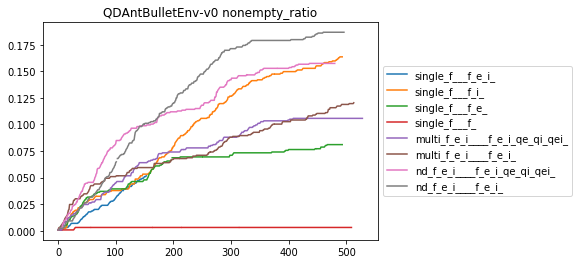

QDHopperBulletEnv-v0 nonempty_ratio


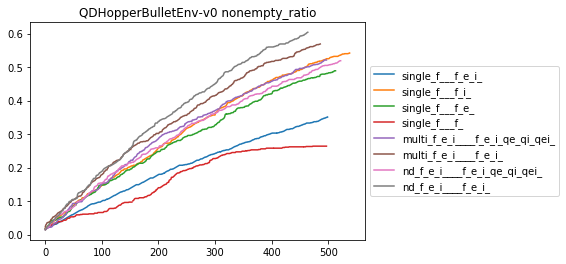

QDWalker2DBulletEnv-v0 nonempty_ratio


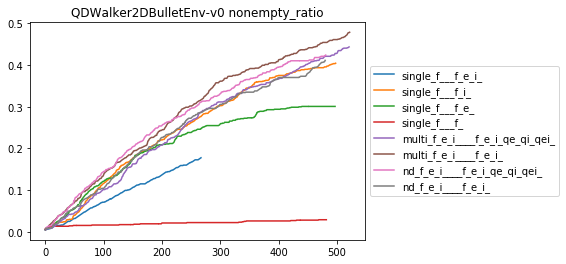

QDHalfCheetahBulletEnv-v0 qd_score


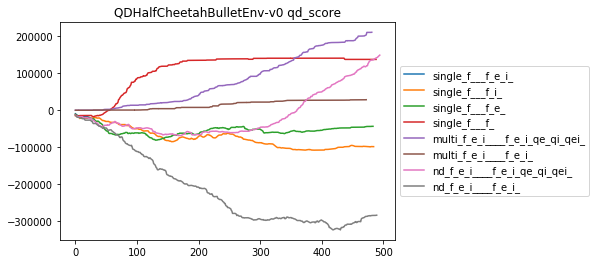

QDAntBulletEnv-v0 qd_score


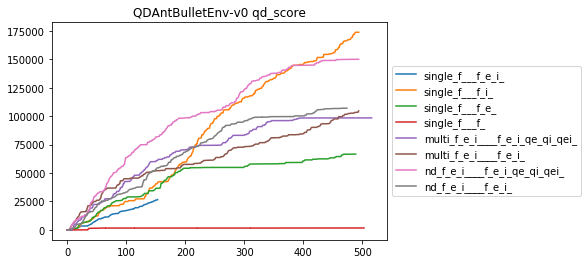

QDHopperBulletEnv-v0 qd_score


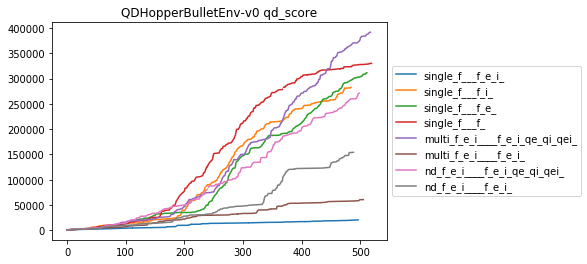

QDWalker2DBulletEnv-v0 qd_score


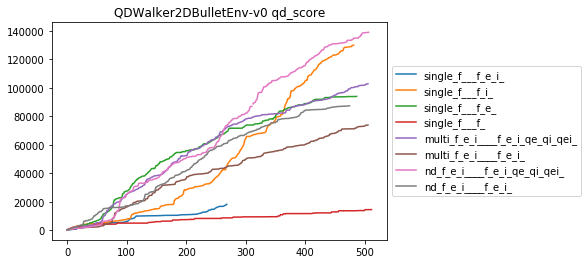

QDHalfCheetahBulletEnv-v0 best_fitness_so_far


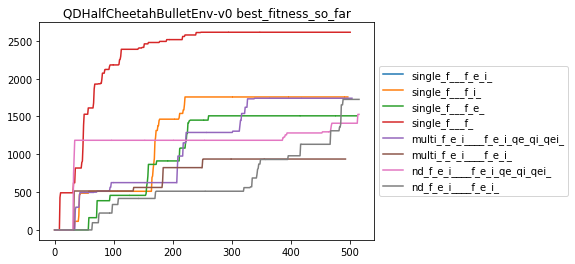

QDAntBulletEnv-v0 best_fitness_so_far


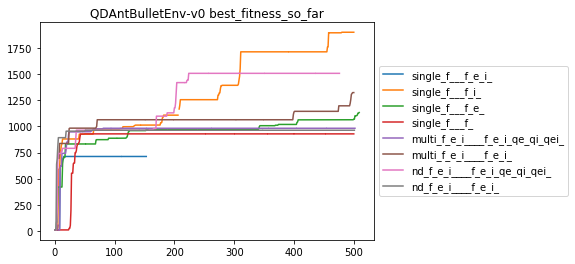

QDHopperBulletEnv-v0 best_fitness_so_far


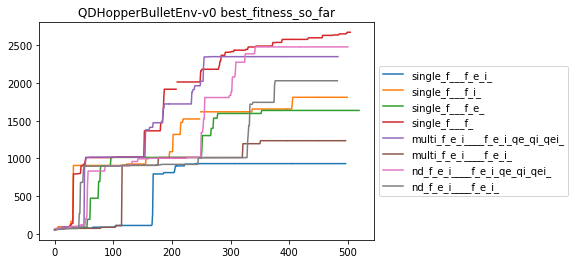

QDWalker2DBulletEnv-v0 best_fitness_so_far


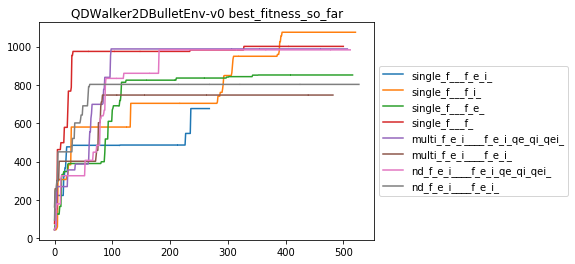

In [44]:
keys_to_plot = ["nonempty_ratio","qd_score","best_fitness_so_far"]

for plot_key in keys_to_plot:
    for env_name,runs in env_runs.items():
        print(env_name,plot_key)
        labels = []
        for run in runs:
            run_df = run.history()
            labels.append(config_to_algo_name(run.config))
            plt.plot(run_df[plot_key])
        plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(env_name+" "+plot_key)
        plt.show()


In [43]:
run = sweep_runs[0]

In [38]:


#for run in sweep_runs:
#    print(run.config["env_id"])

for run in sweep_runs:
    #print(run.config["ES_UPDATES_MODES_TO_USE"])
    print(run.config["BMAP_type_and_metrics"])

{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'multi_map', 'metrics': ['eval_fitness', 'evolvability', 'innovation']}
{'type': 'multi_map', 'metrics': ['eval_fitness', 'evolvability', 'innovation']}
{'type

In [11]:
run.config

{'ES_lr': 0.01,
 'env_id': 'QDAntBulletEnv-v0',
 'ES_sigma': 0.02,
 'env_args': {'use_norm_obs': True},
 'ES_popsize': 2000,
 'ES_L2_COEFF': 0.005,
 'policy_args': {'init': 'normc',
  'layers': [128, 128],
  'activation': 'tanh',
  'action_noise': 0.01},
 'ALGORITHM_TYPE': 'MAP_ES',
 'PLOT_FREQUENCY': 100,
 'ES_OPTIMIZER_TYPE': 'ADAM',
 'GA_MUTATION_POWER': 0.02,
 'ES_NUM_GENERATIONS': 1000,
 'GA_NUM_EVALUATIONS': 10,
 'CHECKPOINT_FREQUENCY': 100,
 'GA_MULTI_PARENT_MODE': True,
 'BMAP_type_and_metrics': {'type': 'single_map', 'metrics': ['eval_fitness']},
 'ES_UPDATES_MODES_TO_USE': ['fitness'],
 'ES_EVALUATION_BATCH_SIZE': 5,
 'ES_PARENT_SELECTION_MODE': 'rank_proportional',
 'GA_PARENT_SELECTION_MODE': 'rank_proportional',
 'ES_CENTRAL_NUM_EVALUATIONS': 30,
 'GA_CHILDREN_PER_GENERATION': 200,
 'map_elites_grid_description': {'bc_limits': [[0, 1], [0, 1], [0, 1], [0, 1]],
  'grid_dims': [6, 6, 6, 6]},
 'GA_MAP_ELITES_NUM_GENERATIONS': 1000,
 'ES_ND_SORT_MAX_FRONT_SIZE_TO_KEEP': 6,
 'N

In [23]:
run.history()

,current_evolvability,best_fitness_so_far,_step,_runtime,current_children_fitness_std,current_children_fitness_mean,nonempty_ratio,qd_score,current_entropy,current_innovation,best_evolvability_so_far,current_eval_fitness,nonempty_cells,evaluations_so_far,generation_number,_timestamp,b_map_plot
0,0.000006,10.001516,0,44,0.040016,9.953739,0.000772,10.001516,3.121097e-06,0.000000,0.000006,9.996382,1.0,0,0,1642868929,NaN
1,0.000005,10.001516,1,49,0.052234,9.951088,0.000772,10.001516,2.497190e-06,0.000100,0.000006,9.989919,1.0,2000,1,1642868934,NaN
2,0.000006,10.001516,2,54,0.047763,9.951064,0.000772,10.001516,3.121097e-06,0.000125,0.000006,9.988058,1.0,4000,2,1642868939,NaN
3,0.000001,10.001516,6,75,0.022847,9.953655,0.000772,10.001516,6.245316e-07,0.000025,0.000006,9.987676,1.0,12000,6,1642868960,NaN
4,0.000063,10.001516,10,95,0.049749,9.919810,0.000772,10.001516,3.110895e-05,0.000293,0.000063,9.964118,1.0,20000,10,1642868980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.003872,929.101490,999,111861,62.952178,527.520043,0.003086,1720.681928,4.895334e-03,0.030207,0.866055,516.609213,4.0,1978000,989,1642980746,NaN
487,0.005568,929.101490,1004,112504,61.476348,528.422830,0.003086,1720.681928,5.669440e-03,0.031123,0.866055,522.253697,4.0,1988000,994,1642981389,NaN
488,0.004780,929.101490,1006,112752,62.629814,523.369567,0.003086,1720.681928,5.426401e-03,0.031615,0.866055,527.861106,4.0,1992000,996,1642981637,NaN
489,0.004250,929.101490,1008,113008,60.455645,524.897623,0.003086,1720.681928,5.137246e-03,0.031323,0.866055,504.612678,4.0,1996000,998,1642981893,NaN
